In [1]:
from fbprophet import Prophet
from matplotlib import pyplot
import pandas as pd
import numpy as np
from numpy import log
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests
from sklearn import preprocessing

In [2]:
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-US', tz=360)

In [3]:
kw_list1 = ['Roofing materials']
kw_list2 = ['GAF Timberline HD']
kw_list3 = ['Carlisle']
kw_list4 = ['gaf shingles']

In [4]:
pytrends.build_payload(kw_list1, timeframe='today 5-y', geo='US', gprop='')
interest_over_time_df1 = pytrends.interest_over_time()
interest_over_time_df1 = interest_over_time_df1.drop(columns=['isPartial'])

print(interest_over_time_df1)

            Roofing materials
date                         
2014-09-21                 82
2014-09-28                 85
2014-10-05                 79
2014-10-12                 81
2014-10-19                 73
...                       ...
2019-08-18                 64
2019-08-25                 56
2019-09-01                 66
2019-09-08                 44
2019-09-15                 32

[261 rows x 1 columns]


In [5]:
pytrends.build_payload(kw_list2, timeframe='today 5-y', geo='US', gprop='')
interest_over_time_df2 = pytrends.interest_over_time()
interest_over_time_df2 = interest_over_time_df2.drop(columns=['isPartial'])

print(interest_over_time_df2)

            GAF Timberline HD
date                         
2014-09-21                 38
2014-09-28                 35
2014-10-05                 41
2014-10-12                 43
2014-10-19                 23
...                       ...
2019-08-18                 55
2019-08-25                 49
2019-09-01                 49
2019-09-08                 71
2019-09-15                 43

[261 rows x 1 columns]


In [6]:
pytrends.build_payload(kw_list3, timeframe='today 5-y', geo='US', gprop='')
interest_over_time_df3 = pytrends.interest_over_time()
interest_over_time_df3 = interest_over_time_df3.drop(columns=['isPartial'])

print(interest_over_time_df3)

            Carlisle
date                
2014-09-21        71
2014-09-28        78
2014-10-05        70
2014-10-12        74
2014-10-19        69
...              ...
2019-08-18        92
2019-08-25        79
2019-09-01        79
2019-09-08        79
2019-09-15        72

[261 rows x 1 columns]


In [7]:
pytrends.build_payload(kw_list4, timeframe='today 5-y', geo='US', gprop='')
interest_over_time_df4 = pytrends.interest_over_time()
interest_over_time_df4 = interest_over_time_df4.drop(columns=['isPartial'])

print(interest_over_time_df4)

            gaf shingles
date                    
2014-09-21            75
2014-09-28            55
2014-10-05            66
2014-10-12            77
2014-10-19            74
...                  ...
2019-08-18            93
2019-08-25            84
2019-09-01            71
2019-09-08            88
2019-09-15            61

[261 rows x 1 columns]


In [8]:
interest_over_time_df = pd.concat([interest_over_time_df1,interest_over_time_df2,interest_over_time_df3,interest_over_time_df4], axis=1)
print(interest_over_time_df)

            Roofing materials  GAF Timberline HD  Carlisle  gaf shingles
date                                                                    
2014-09-21                 82                 38        71            75
2014-09-28                 85                 35        78            55
2014-10-05                 79                 41        70            66
2014-10-12                 81                 43        74            77
2014-10-19                 73                 23        69            74
...                       ...                ...       ...           ...
2019-08-18                 64                 55        92            93
2019-08-25                 56                 49        79            84
2019-09-01                 66                 49        79            71
2019-09-08                 44                 71        79            88
2019-09-15                 32                 43        72            61

[261 rows x 4 columns]


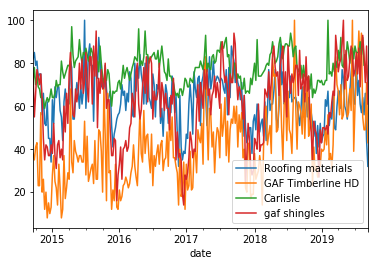

In [9]:
pd.plotting.register_matplotlib_converters()
interest_over_time_df.plot()
pyplot.show()

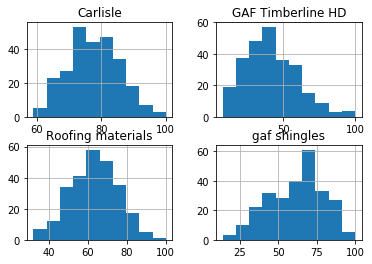

In [10]:
interest_over_time_df.hist()
pyplot.show()

===== CHECK FOR STATIONARITY FOR ALL 4 TIMESERIES =====

In [42]:
#Determing rolling statistics
ts = interest_over_time_df['GAF Timberline HD']
rolmean = ts.rolling(20).mean()
rolstd = ts.rolling(20).std()

print(rolmean,rolstd)

date
2014-09-21      NaN
2014-09-28      NaN
2014-10-05      NaN
2014-10-12      NaN
2014-10-19      NaN
              ...  
2019-08-18    68.25
2019-08-25    67.35
2019-09-01    67.00
2019-09-08    67.05
2019-09-15    66.50
Name: GAF Timberline HD, Length: 261, dtype: float64 date
2014-09-21          NaN
2014-09-28          NaN
2014-10-05          NaN
2014-10-12          NaN
2014-10-19          NaN
                ...    
2019-08-18    15.820955
2019-08-25    16.397288
2019-09-01    16.723762
2019-09-08    16.734694
2019-09-15    17.355418
Name: GAF Timberline HD, Length: 261, dtype: float64


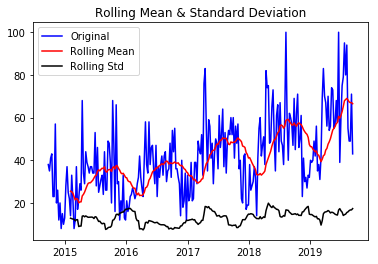

In [43]:
#Plot rolling statistics:
orig = pyplot.plot(ts, color='blue',label='Original')
mean = pyplot.plot(rolmean, color='red', label='Rolling Mean')
std = pyplot.plot(rolstd, color='black', label = 'Rolling Std')
pyplot.legend(loc='best')
pyplot.title('Rolling Mean & Standard Deviation')
pyplot.show(block=False)

In [70]:
#Perform Dickey-Fuller test:
# Since here Critical value is not more than the Test Statistic value, so here we cannot reject the null hypothesis and data is not stationary
print('Results of Dickey-Fuller Test:')
dftest = adfuller(rolmean.dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.894974
p-value                          0.045936
#Lags Used                       5.000000
Number of Observations Used    236.000000
Critical Value (10%)            -2.573339
Critical Value (5%)             -2.873866
Critical Value (1%)             -3.458366
dtype: float64


In [48]:
#Perform Dickey-Fuller test:
# Since here Critical value is not more than the Test Statistic value, so here we cannot reject the null hypothesis and data is not stationary
print('Results of Dickey-Fuller Test:')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.832885
p-value                          0.053728
#Lags Used                       4.000000
Number of Observations Used    256.000000
Critical Value (10%)            -2.572822
Critical Value (5%)             -2.872897
Critical Value (1%)             -3.456155
dtype: float64


In [14]:
#Perform Dickey-Fuller test for Roofing materials, gaf shingles and Carlisle:
# Since here Critical value is more than the Test Statistic value for Roofing materials, gaf shingles and Carlisle, so here we reject the null hypothesis and data is stationary
ts_others = interest_over_time_df['Roofing materials']
print('Results of Dickey-Fuller Test:')
dftest = adfuller(ts_others, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -4.289651
p-value                          0.000463
#Lags Used                       6.000000
Number of Observations Used    254.000000
Critical Value (10%)            -2.572870
Critical Value (5%)             -2.872987
Critical Value (1%)             -3.456360
dtype: float64


=========Non-Stationary to Stationary=========

==============METHOD 1: 
MOVING AVERAGE TO MAKE STATIONARY===================

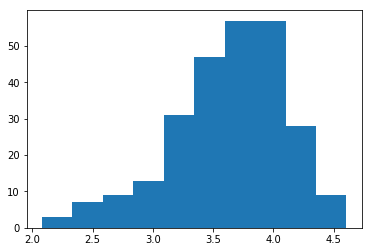

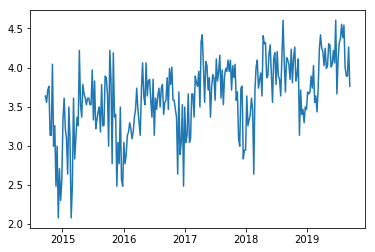

In [15]:
# #Log Tranformation to reduce trend
# #Taking log to flatten out exponential change back to a linear relationship.
ts_logscale = np.log(ts)
pyplot.hist(ts_logscale)
pyplot.show()
pyplot.plot(ts_logscale)
pyplot.show()

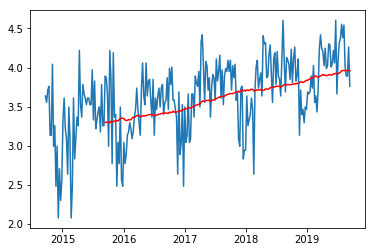

In [16]:
moving_avg = ts_logscale.rolling(52).mean()
moving_std = ts_logscale.rolling(52).std()
pyplot.plot(ts_logscale)
pyplot.plot(moving_avg, color='red')

In [17]:
ts_log_moving_avg_diff = ts_logscale - moving_avg
ts_log_moving_avg_diff

#Remove NaN
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

date
2015-09-13    0.593137
2015-09-20    0.568025
2015-09-27    0.358305
2015-10-04   -0.295720
2015-10-11    0.919242
Name: GAF Timberline HD, dtype: float64

In [18]:
def test_stationarity(timeseries):

    #Determing rolling statistics
#     ts = interest_over_time_df['GAF Timberline HD']
    moving_avg = timeseries.rolling(52).mean()
    moving_std = timeseries.rolling(52).std()

    #Plot rolling statistics:
    orig = pyplot.plot(timeseries, color='blue',label='Original')
    mean = pyplot.plot(moving_avg, color='red', label='Rolling Mean')
    std = pyplot.plot(moving_std, color='black', label = 'Rolling Std')
    pyplot.legend(loc='best')
    pyplot.title('Rolling Mean & Standard Deviation')
    pyplot.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

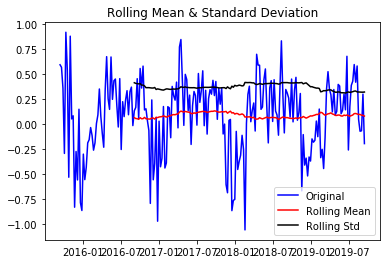

Results of Dickey-Fuller Test:
Test Statistic                  -4.797958
p-value                          0.000055
#Lags Used                       9.000000
Number of Observations Used    200.000000
Critical Value (10%)            -2.574532
Critical Value (5%)             -2.876102
Critical Value (1%)             -3.463476
dtype: float64


In [19]:
test_stationarity(ts_log_moving_avg_diff)

In [20]:
print(ts_log_moving_avg_diff)

date
2015-09-13    0.593137
2015-09-20    0.568025
2015-09-27    0.358305
2015-10-04   -0.295720
2015-10-11    0.919242
                ...   
2019-08-18    0.046252
2019-08-25   -0.073164
2019-09-01   -0.068639
2019-09-08    0.298984
2019-09-15   -0.197076
Name: GAF Timberline HD, Length: 210, dtype: float64


================= METHOD 2: EXPONENTIALLY WEIGHTED MOVING AVERAGE TO MAKE STATIONARY===============

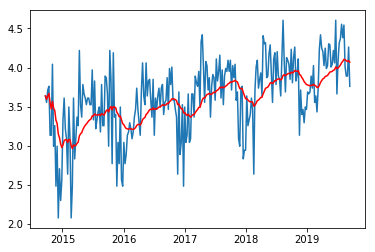

In [21]:
#take a ‘weighted moving average’ where more recent values are given a higher weight
#‘halflife’ is used to define the amount of exponential decay
#Calculate weighted average timeseries to see the trend present in time series

expwighted_avg = ts_logscale.ewm(halflife=12, min_periods=0, adjust = True).mean()
pyplot.plot(ts_logscale)
pyplot.plot(expwighted_avg, color='red')

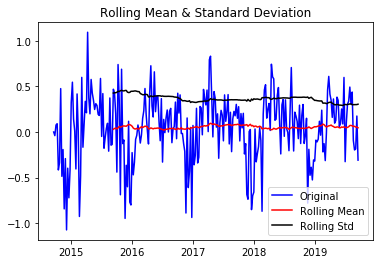

Results of Dickey-Fuller Test:
Test Statistic                  -5.244492
p-value                          0.000007
#Lags Used                      16.000000
Number of Observations Used    244.000000
Critical Value (10%)            -2.573122
Critical Value (5%)             -2.873459
Critical Value (1%)             -3.457438
dtype: float64


In [22]:
ts_log_ewma_diff = ts_logscale - expwighted_avg
test_stationarity(ts_log_ewma_diff)

In [23]:
print(ts_log_ewma_diff)

date
2014-09-21    0.000000
2014-09-28   -0.039932
2014-10-05    0.076563
2014-10-12    0.090404
2014-10-19   -0.415531
                ...   
2019-08-18   -0.093037
2019-08-25   -0.196845
2019-09-01   -0.185797
2019-09-08    0.174676
2019-09-15   -0.308462
Name: GAF Timberline HD, Length: 261, dtype: float64


In [34]:
GC1 = pd.concat([interest_over_time_df['gaf shingles'], interest_over_time_df['Roofing materials'],ts_log_ewma_diff], axis=1)
print(GC1)

            gaf shingles  Roofing materials  GAF Timberline HD
date                                                          
2014-09-21            75                 82           0.000000
2014-09-28            55                 85          -0.039932
2014-10-05            66                 79           0.076563
2014-10-12            77                 81           0.090404
2014-10-19            74                 73          -0.415531
...                  ...                ...                ...
2019-08-18            93                 64          -0.093037
2019-08-25            84                 56          -0.196845
2019-09-01            71                 66          -0.185797
2019-09-08            88                 44           0.174676
2019-09-15            61                 32          -0.308462

[261 rows x 3 columns]


In [35]:
GC1["Roofing materials"]=((GC1["Roofing materials"]-GC1["Roofing materials"].min())/(GC1["Roofing materials"].max()-GC1["Roofing materials"].min()))



In [36]:

GC1["gaf shingles"]=((GC1["gaf shingles"]-GC1["gaf shingles"].min())/(GC1["gaf shingles"].max()-GC1["gaf shingles"].min()))
print(GC1["gaf shingles"])                      

date
2014-09-21    0.709302
2014-09-28    0.476744
2014-10-05    0.604651
2014-10-12    0.732558
2014-10-19    0.697674
                ...   
2019-08-18    0.918605
2019-08-25    0.813953
2019-09-01    0.662791
2019-09-08    0.860465
2019-09-15    0.546512
Name: gaf shingles, Length: 261, dtype: float64


In [37]:
GC1["GAF Timberline HD"]=((GC1["GAF Timberline HD"]-GC1["GAF Timberline HD"].min())/(GC1["GAF Timberline HD"].max()-GC1["GAF Timberline HD"].min()))
print(GC1)



            gaf shingles  Roofing materials  GAF Timberline HD
date                                                          
2014-09-21      0.709302           0.735294           0.495366
2014-09-28      0.476744           0.779412           0.476917
2014-10-05      0.604651           0.691176           0.530738
2014-10-12      0.732558           0.720588           0.537133
2014-10-19      0.697674           0.602941           0.303390
...                  ...                ...                ...
2019-08-18      0.918605           0.470588           0.452383
2019-08-25      0.813953           0.352941           0.404423
2019-09-01      0.662791           0.500000           0.409527
2019-09-08      0.860465           0.176471           0.576067
2019-09-15      0.546512           0.000000           0.352856

[261 rows x 3 columns]


=========== GRANGER CAUSALITY TEST ===========

In [41]:
#data to test whether the time series in the second column Granger causes the time series in the first column

#the null hypothesis of the granger causality is commonly that the X does not granger cause Y, 
#so a low value of F statistic which results in a p-value above 0.05 will conclude
#not to reject the null hypothesis of X does not granger cause Y.
## HERE, the P-Values are Zero and are less than a significance level (0.05) then we can reject 
#the null hypothesis and conclude that KEYWORD ‘gaf shingles’ indeed can be used to forecast the keyword 'GAF Timberline HD'
grangercausalitytests(GC1[['GAF Timberline HD','gaf shingles']], maxlag= 2)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=25.1480 , p=0.0000  , df_denom=257, df_num=1
ssr based chi2 test:   chi2=25.4415 , p=0.0000  , df=1
likelihood ratio test: chi2=24.2724 , p=0.0000  , df=1
parameter F test:         F=25.1480 , p=0.0000  , df_denom=257, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.2575  , p=0.0009  , df_denom=254, df_num=2
ssr based chi2 test:   chi2=14.8007 , p=0.0006  , df=2
likelihood ratio test: chi2=14.3932 , p=0.0007  , df=2
parameter F test:         F=7.2575  , p=0.0009  , df_denom=254, df_num=2


{1: ({'lrtest': (24.272441811588806, 8.36270136724928e-07, 1),
   'params_ftest': (25.14796455163921, 9.90704710047034e-07, 257.0, 1.0),
   'ssr_chi2test': (25.441520558078597, 4.559974826413325e-07, 1),
   'ssr_ftest': (25.14796455163923, 9.90704710047034e-07, 257.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (14.393211660621887, 0.0007491241526464496, 2),
   'params_ftest': (7.257464354931041, 0.0008607768901806698, 254.0, 2.0),
   'ssr_chi2test': (14.800655652969644, 0.0006110524091276945, 2),
   'ssr_ftest': (7.257464354931061, 0.0008607768901806569, 254.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [49]:
grangercausalitytests(interest_over_time_df[['Roofing materials','Carlisle']], maxlag=10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.5498 , p=0.0005  , df_denom=257, df_num=1
ssr based chi2 test:   chi2=12.6963 , p=0.0004  , df=1
likelihood ratio test: chi2=12.3961 , p=0.0004  , df=1
parameter F test:         F=12.5498 , p=0.0005  , df_denom=257, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.1962  , p=0.0024  , df_denom=254, df_num=2
ssr based chi2 test:   chi2=12.6364 , p=0.0018  , df=2
likelihood ratio test: chi2=12.3378 , p=0.0021  , df=2
parameter F test:         F=6.1962  , p=0.0024  , df_denom=254, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.1804  , p=0.0017  , df_denom=251, df_num=3
ssr based chi2 test:   chi2=15.9747 , p=0.0011  , df=3
likelihood ratio test: chi2=15.4997 , p=0.0014  , df=3
parameter F test:         F=5.1804  , p=0.0017  , df_denom=251, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.7911  , p=0.0052  

{1: ({'lrtest': (12.39607329666228, 0.000430237628074274, 1),
   'params_ftest': (12.549835031320766, 0.0004704431514297999, 257.0, 1.0),
   'ssr_chi2test': (12.696331160097825, 0.0003663736953453245, 1),
   'ssr_ftest': (12.549835031327465, 0.0004704431514281986, 257.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (12.337829489712249, 0.0020935067570939853, 2),
   'params_ftest': (6.196235241583423, 0.002358277671439654, 254.0, 2.0),
   'ssr_chi2test': (12.636416752520198, 0.001803171218306235, 2),
   'ssr_ftest': (6.196235241583263, 0.002358277671440038, 254.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (15.499670628867761, 0.0014358087303772372, 3),
   'params_ftest': (5.1804314162720955, 0.0017258511268030156, 251.0, 3.0),
   'ssr_chi2test': (15.974716797589219, 0.0011475994342926945, 3),
   'ssr_ftest': (5.180431416272473, 0.0017258511268021534, 251.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 

In [39]:
grangercausalitytests(GC1[['GAF Timberline HD','Roofing materials']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.8886  , p=0.0279  , df_denom=257, df_num=1
ssr based chi2 test:   chi2=4.9456  , p=0.0262  , df=1
likelihood ratio test: chi2=4.8992  , p=0.0269  , df=1
parameter F test:         F=4.8886  , p=0.0279  , df_denom=257, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7043  , p=0.1840  , df_denom=254, df_num=2
ssr based chi2 test:   chi2=3.4758  , p=0.1759  , df=2
likelihood ratio test: chi2=3.4527  , p=0.1779  , df=2
parameter F test:         F=1.7043  , p=0.1840  , df_denom=254, df_num=2


{1: ({'lrtest': (4.899198165451139, 0.02686916877226674, 1),
   'params_ftest': (4.888582259717508, 0.02791561302826816, 257.0, 1.0),
   'ssr_chi2test': (4.94564742228229, 0.026156440830457046, 1),
   'ssr_ftest': (4.888582259717494, 0.02791561302826816, 257.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (3.452655063006432, 0.17793667836493277, 2),
   'params_ftest': (1.7043355108363705, 0.1839666578406841, 254.0, 2.0),
   'ssr_chi2test': (3.4757708449340496, 0.1758919448037706, 2),
   'ssr_ftest': (1.7043355108363871, 0.18396665784067978, 254.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [36]:
grangercausalitytests(interest_over_time_df[['Roofing materials','gaf shingles']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=18.1843 , p=0.0000  , df_denom=257, df_num=1
ssr based chi2 test:   chi2=18.3965 , p=0.0000  , df=1
likelihood ratio test: chi2=17.7749 , p=0.0000  , df=1
parameter F test:         F=18.1843 , p=0.0000  , df_denom=257, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.2306  , p=0.0059  , df_denom=254, df_num=2
ssr based chi2 test:   chi2=10.6672 , p=0.0048  , df=2
likelihood ratio test: chi2=10.4533 , p=0.0054  , df=2
parameter F test:         F=5.2306  , p=0.0059  , df_denom=254, df_num=2


{1: ({'lrtest': (17.774871314176153, 2.4864561792099594e-05, 1),
   'params_ftest': (18.18427786195289, 2.819452479410688e-05, 257.0, 1.0),
   'ssr_chi2test': (18.39654569691768, 1.7938288018242773e-05, 1),
   'ssr_ftest': (18.184277861953248, 2.8194524794101477e-05, 257.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (10.453346368779876, 0.0053713651526976075, 2),
   'params_ftest': (5.230617063328898, 0.005941627711367817, 254.0, 2.0),
   'ssr_chi2test': (10.667163932303614, 0.004826749756232435, 2),
   'ssr_ftest': (5.230617063330344, 0.0059416277113595395, 254.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [37]:
grangercausalitytests(interest_over_time_df[['gaf shingles','Roofing materials']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=13.0615 , p=0.0004  , df_denom=257, df_num=1
ssr based chi2 test:   chi2=13.2140 , p=0.0003  , df=1
likelihood ratio test: chi2=12.8892 , p=0.0003  , df=1
parameter F test:         F=13.0615 , p=0.0004  , df_denom=257, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.3508  , p=0.0139  , df_denom=254, df_num=2
ssr based chi2 test:   chi2=8.8729  , p=0.0118  , df=2
likelihood ratio test: chi2=8.7243  , p=0.0128  , df=2
parameter F test:         F=4.3508  , p=0.0139  , df_denom=254, df_num=2


{1: ({'lrtest': (12.889173781984482, 0.00033048829488765513, 1),
   'params_ftest': (13.061532237732392, 0.000362580659143014, 257.0, 1.0),
   'ssr_chi2test': (13.214001485643639, 0.00027786549389525415, 1),
   'ssr_ftest': (13.061532237732365, 0.000362580659143014, 257.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (8.724325640545658, 0.012750780159454737, 2),
   'params_ftest': (4.350817696991359, 0.013871052243652166, 254.0, 2.0),
   'ssr_chi2test': (8.872927429301331, 0.011837726167296217, 2),
   'ssr_ftest': (4.3508176969933166, 0.013871052243625889, 254.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}